In [1]:
from dataloader import Flow360Loader
from pathlib import Path
from torchvision.transforms import ToPILImage, ToTensor
from simsiam import Siam360
from RAFT import load_raft
import torch
import torch.nn as nn
from utils import flow_to_image
from PIL import Image
import matplotlib.pyplot as plt
from ktnfyraft import getKTNisedRaft
load = True
DEVICE_IDS = [0,1,2,3,4,5,6,7]
DEVICE = "cuda:0"

In [2]:
savedir = Path("qualitative_results/")

In [3]:
loader = Flow360Loader(root_path = Path('/data/keshav/flow360/FLOW360_train_test'), mode = 'test', items = ['frame1','frame2', 'fflow',], transform = {'resize' : (320,640), 'rotation': False, 'seed' : 360})

In [28]:
# possible schemes
# ['ktn',
#  'singlerotation',
#  'switchrotation',
#  'doublerotation',
#  'raft',
#  'raftfinetune']
scheme = 'singlerotation'


schemes = {'ktn':'weights/ktn.pt', 
           'singlerotation':'weights/singlerotation.pt', 
           'switchrotation':'weights/switchrotation.pt', 
           'doublerotation':'weights/doublerotation.pt', 
           'raft':'weights/raft.pt', 
           'raftfinetune':'weights/raftfinetune.pt'}
if scheme in ['singlerotation','switchrotation','doublerotation']:
    model = Siam360(load_raft.load(path_root="RAFT", data_parallel=False, simsiam=True, load = load).train(False), finetune = False)
elif scheme in ['raft', 'raftfinetune']:
    model = Siam360(load_raft.load(path_root="RAFT", data_parallel=False, simsiam=True, load = load).train(False), finetune = True)
else:
    model = Siam360(getKTNisedRaft().train(False), finetune = True)

In [5]:
MODEL_PATH = 'weights/ktn.pt'

In [6]:
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()
print()

In [7]:
raft = model.encoder

In [8]:
raft = nn.DataParallel(raft, device_ids = DEVICE_IDS)

1174


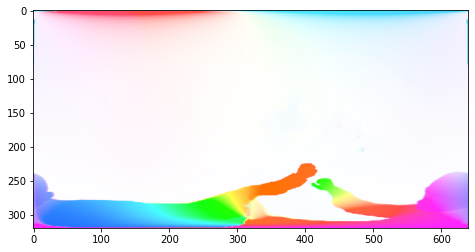

In [12]:
data = loader[1171]

frame1_0 = data['frame1'].unsqueeze(0)#.cuda().to(DEVICE)
frame2_0 = data['frame2'].unsqueeze(0)#.cuda().to(DEVICE)
fflow_0 = data['fflow'].permute(1,2,0).numpy()

data = loader[547]
frame1_1 = data['frame1'].unsqueeze(0)#.cuda().to(DEVICE)
frame2_1 = data['frame2'].unsqueeze(0)#.cuda().to(DEVICE)
fflow_1 = data['fflow'].permute(1,2,0).numpy()

data = loader[745]
frame1_2 = data['frame1'].unsqueeze(0)#.cuda().to(DEVICE)
frame2_2 = data['frame2'].unsqueeze(0)#.cuda().to(DEVICE)
fflow_2 = data['fflow'].permute(1,2,0).numpy()

data = loader[872]
frame1_3 = data['frame1'].unsqueeze(0)#.cuda().to(DEVICE)
frame2_3 = data['frame2'].unsqueeze(0)#.cuda().to(DEVICE)
fflow_3 = data['fflow'].permute(1,2,0).numpy()

data = loader[11]
frame1_4 = data['frame1'].unsqueeze(0)#.cuda().to(DEVICE)
frame2_4 = data['frame2'].unsqueeze(0)#.cuda().to(DEVICE)
fflow_4 = data['fflow'].permute(1,2,0).numpy()


In [13]:
# plt.figure(figsize=(8,4))
# plt.imshow(flow_to_image(fflow_3))

In [14]:
# plt.figure(figsize=(8,4))
# # plt.imshow(flow_to_image(fflow_1))

In [15]:
ToPILImage()(frame1_0[0]).save(savedir/"frame1_0.png")
ToPILImage()(frame2_0[0]).save(savedir/"frame2_0.png")

ToPILImage()(frame1_1[0]).save(savedir/"frame1_1.png")
ToPILImage()(frame2_1[0]).save(savedir/"frame2_1.png")

ToPILImage()(frame1_2[0]).save(savedir/"frame1_2.png")
ToPILImage()(frame2_2[0]).save(savedir/"frame2_2.png")

ToPILImage()(frame1_3[0]).save(savedir/"frame1_3.png")
ToPILImage()(frame2_3[0]).save(savedir/"frame2_3.png")

ToPILImage()(frame1_4[0]).save(savedir/"frame1_4.png")
ToPILImage()(frame2_4[0]).save(savedir/"frame2_4.png")

Image.fromarray(flow_to_image(fflow_0.clip(-10,10))).save(savedir/"fflow_0.png")
Image.fromarray(flow_to_image(fflow_1.clip(-10,10))).save(savedir/"fflow_1.png")
Image.fromarray(flow_to_image(fflow_2.clip(-10,10))).save(savedir/"fflow_2.png")
Image.fromarray(flow_to_image(fflow_3.clip(-10,10))).save(savedir/"fflow_3.png")
Image.fromarray(flow_to_image(fflow_4.clip(-10,10))).save(savedir/"fflow_4.png")

In [16]:
frame1_0 = frame1_0.cuda().to(DEVICE)*255
frame2_0 = frame2_0.cuda().to(DEVICE)*255

frame1_1 = frame1_1.cuda().to(DEVICE)*255
frame2_1 = frame2_1.cuda().to(DEVICE)*255

frame1_2 = frame1_2.cuda().to(DEVICE)*255
frame2_2 = frame2_2.cuda().to(DEVICE)*255

frame1_3 = frame1_3.cuda().to(DEVICE)*255
frame2_3 = frame2_3.cuda().to(DEVICE)*255

frame1_4 = frame1_4.cuda().to(DEVICE)*255
frame2_4 = frame2_4.cuda().to(DEVICE)*255

In [17]:
# _, fflow_pred_0 = raft(image1 = frame1_0, image2 = frame2_0, iters = 32, test_mode = True)
# torch.cuda.empty_cache()
# fflow_pred_0 = fflow_pred_0[0].permute(1,2,0).detach().cpu().numpy()
# Image.fromarray(flow_to_image(fflow_pred_0.clip(-10,10))).save(savedir/f"{scheme}_0.png")

In [18]:
# pass

In [19]:
# _, fflow_pred_1 = raft(image1 = frame1_1, image2 = frame2_1, iters = 32, test_mode = True)
# torch.cuda.empty_cache()
# fflow_pred_1 = fflow_pred_1[0].permute(1,2,0).detach().cpu().numpy()
# Image.fromarray(flow_to_image(fflow_pred_1.clip(-10,10))).save(savedir/f"{scheme}_1.png")

In [20]:
# pass

In [21]:
# _, fflow_pred_2 = raft(image1 = frame1_2, image2 = frame2_2, iters = 32, test_mode = True)
# torch.cuda.empty_cache()
# fflow_pred_2 = fflow_pred_2[0].permute(1,2,0).detach().cpu().numpy()
# Image.fromarray(flow_to_image(fflow_pred_2.clip(-10,10))).save(savedir/f"{scheme}_2.png")

In [22]:
# pass

In [23]:
# _, fflow_pred_3 = raft(image1 = frame1_3, image2 = frame2_3, iters = 32, test_mode = True)
# torch.cuda.empty_cache()
# fflow_pred_3 = fflow_pred_3[0].permute(1,2,0).detach().cpu().numpy()
# Image.fromarray(flow_to_image(fflow_pred_3.clip(-10,10))).save(savedir/f"{scheme}_3.png")

In [24]:
# pass

In [25]:
# _, fflow_pred_4 = raft(image1 = frame1_4, image2 = frame2_4, iters = 32, test_mode = True)
# torch.cuda.empty_cache()
# fflow_pred_4 = fflow_pred_4[0].permute(1,2,0).detach().cpu().numpy()
# Image.fromarray(flow_to_image(fflow_pred_4.clip(-10,10))).save(savedir/f"{scheme}_4.png")